In [1]:
require(fpp)

Loading required package: fpp
Loading required package: forecast
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 

Loading required package: fma
Loading required package: tseries
Loading required package: expsmooth
Loading required package: lmtest


In [2]:
#eggs
begEgg = start(eggs)[1]
endEgg = end(eggs)[1]

forecastLength = 10
xLimEnd = endEgg + forecastLength + 4
yLimBeg = -10

## Analysis of data
There is clearly a downward trend here. Since the data frequency is annual, we cannot extract any seasonality. Which is why it makes sense to use the Holt methods for smoothing. Holt methods allow for forecasting with trending, but not seasonality.

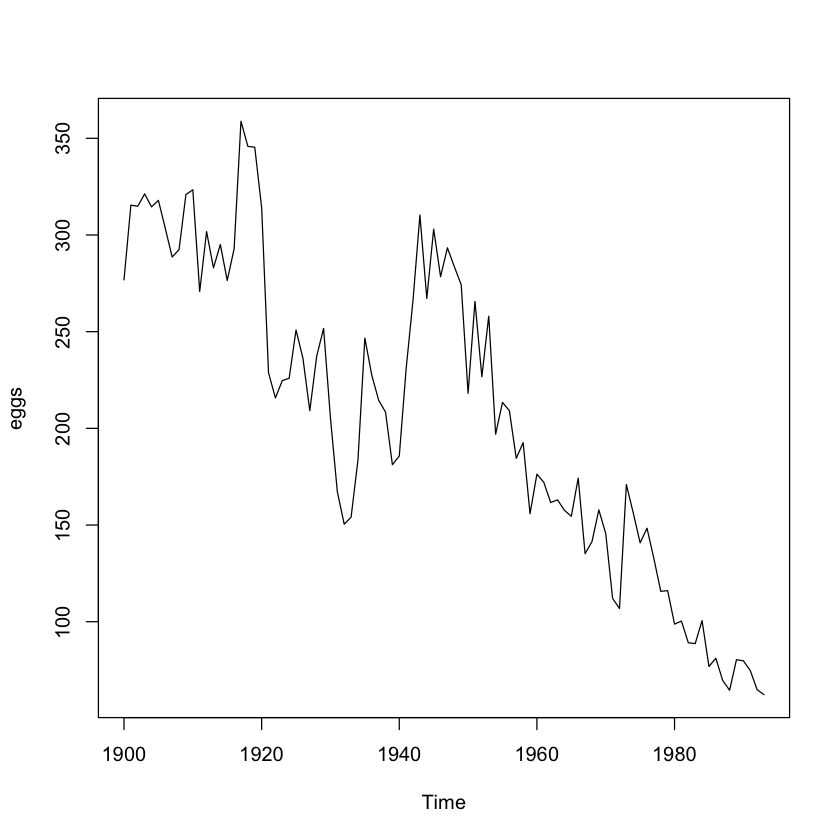

In [3]:
plot(eggs)

## Basic Holt Method

In [5]:
holtAdd = holt(eggs, damped=FALSE, exponential=FALSE, initial="simple", h=forecastLength)

In [6]:
rmse = accuracy(holtAdd)[2]
rmse

[1] 29.00223

In [7]:
summary(holtAdd)


Forecast method: Holt's method

Model Information:
Holt's method 

Call:
 holt(x = eggs, h = forecastLength, damped = FALSE, initial = "simple",  

 Call:
     exponential = FALSE) 

  Smoothing parameters:
    alpha = 0.9036 
    beta  = 0.1411 

  Initial states:
    l = 276.79 
    b = 38.63 

  sigma:  29.0022
Error measures:
                    ME     RMSE      MAE       MPE     MAPE     MASE
Training set -3.501793 29.00223 22.41495 -1.802756 11.03585 1.105696
                    ACF1
Training set -0.01676606

Forecasts:
     Point Forecast       Lo 80     Hi 80       Lo 95    Hi 95
1994       58.92016   21.752301  96.08801    2.076827 115.7635
1995       55.57080   -2.084309 113.22591  -32.605081 143.7467
1996       52.22145  -23.651669 128.09456  -63.816470 168.2594
1997       48.87209  -44.585615 142.32980  -94.059137 191.8033
1998       45.52274  -65.436676 156.48215 -124.175041 215.2205
1999       42.17338  -86.452876 170.79964 -154.543505 238.8903
2000       38.82403 -107.7

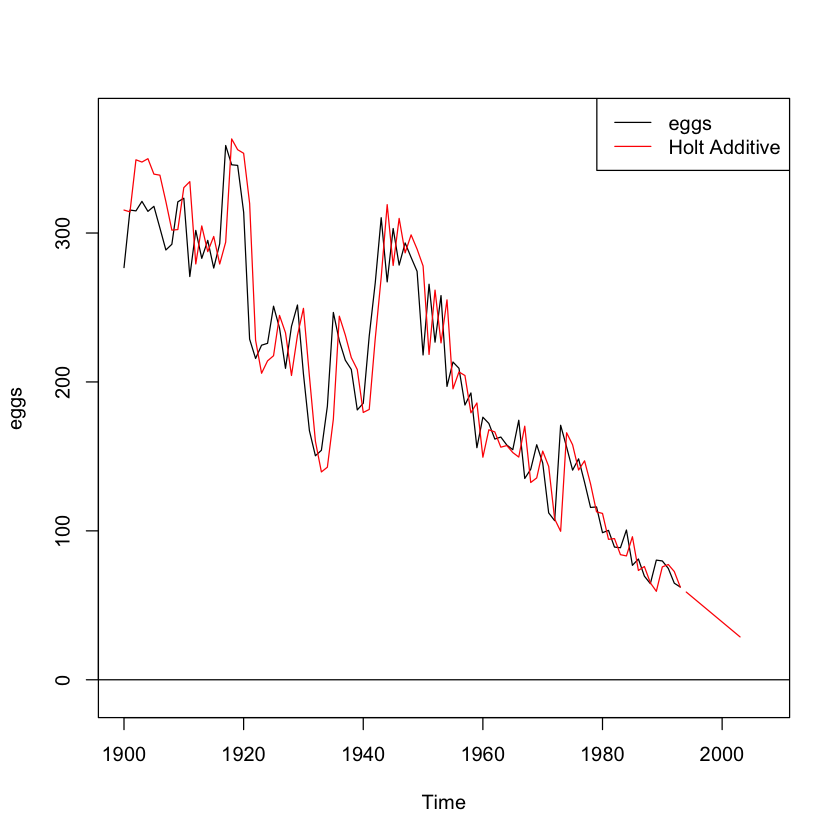

In [8]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtAdd), col="red")
# Plot the forecasted values
lines(holtAdd$mean, col="red")

legend("topright"
       , lty=1
       , col=c("black", "red")
       , c("eggs", "Holt Additive")
       )

## Exponential Holt Method

In [9]:
holtExpo = holt(eggs, damped=FALSE, exponential=TRUE, initial="simple", h=forecastLength)

In [10]:
summary(holtExpo)


Forecast method: Holt's method with exponential trend

Model Information:
Holt's method with exponential trend 

Call:
 holt(x = eggs, h = forecastLength, damped = FALSE, initial = "simple",  

 Call:
     exponential = TRUE) 

  Smoothing parameters:
    alpha = 0.8937 
    beta  = 0.1635 

  Initial states:
    l = 276.79 
    b = 1.1396 

  sigma:  0.1471
Error measures:
                    ME     RMSE     MAE       MPE     MAPE     MASE        ACF1
Training set -5.649901 29.47561 22.8287 -3.071663 11.28449 1.126106 -0.02113287

Forecasts:
     Point Forecast    Lo 80     Hi 80     Lo 95     Hi 95
1994       60.18790 48.93246  71.90912 42.965536  77.85636
1995       58.03385 42.64212  74.86355 36.204057  84.95416
1996       55.95688 37.20956  77.45856 30.184745  92.70090
1997       53.95425 33.14661  80.86296 25.297075 102.63781
1998       52.02329 28.94016  83.95962 21.373669 109.85114
1999       50.16144 25.12966  87.85468 17.534565 120.76853
2000       48.36622 21.81021  93.8648

In [ ]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtExpo), col="blue")
# Plot the forecasted values
lines(holtExpo$mean, col="blue")

legend("topright"
       , lty=1
       , col=c("black", "blue")
       , c("eggs", "Holt Exponential")
       )

## Damped Linear Holt Method

In [ ]:
holtDampedAdd = holt(eggs, damped=TRUE, exponential=FALSE, initial="optimal", h=forecastLength)

In [ ]:
summary(holtDampedAdd)

In [ ]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtDampedAdd), col="green")
# Plot the forecasted values
lines(holtDampedAdd$mean, col="green")

legend("topright"
       , lty=1
       , col=c("black", "green")
       , c("eggs", "Holt Damped Additive")
       )

In [ ]:
## Damped Exponential Holt Method

In [ ]:
holtDampedExpo = holt(eggs, damped=TRUE, exponential=TRUE, initial="optimal", h=forecastLength)

In [ ]:
summary(holtDampedExpo)

In [ ]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values to original
lines(fitted(holtDampedExpo), col="purple")
# Plot the forecasted values
lines(holtDampedExpo$mean, col="purple")

legend("topright"
       , lty=1
       , col=c("black", "green")
       , c("eggs", "Holt Damped Exponential")
       )

## All Together Now

In [ ]:
plot(eggs, xlim=c(begEgg, xLimEnd), ylim=c(yLimBeg, 375))
abline(a=0, b=0)

# Plot the fitted values of Holt Additive
lines(fitted(holtAdd), col="red")
# Plot the forecasted values of Holt Additive
lines(holtAdd$mean, col="red")

# Plot the fitted values of Holt Exponential
lines(fitted(holtExpo), col="blue")
# Plot the forecasted values of Holt Exponential
lines(holtExpo$mean, col="blue")

# Plot the fitted values of Holt Damped Additive
lines(fitted(holtDampedAdd), col="green")
# Plot the forecasted values of Holt Damped Additive
lines(holtDampedAdd$mean, col="green")

# Plot the fitted values of Holt Damped Exponential
lines(fitted(holtDampedExpo), col="purple")
# Plot the forecasted values of Holt Damped Exponential
lines(holtDampedExpo$mean, col="purple")

legend("topright"
       , lty=1
       , col=c("black", "red", "blue", "green", "purple")
       , c("eggs", "Holt Additive", "Holt Exponential", "Holt Damped Additive", "Holt Damped Exponential")
       )